In [2]:
import numpy as np

In [3]:
def get_reward(actual_action_values_mean, action):
    '''
    Simulate getting a reward for a given action.

    Input: action (int) - The action for which to get the reward

    Output: (float) - The simulated reward
    '''
    return np.random.normal(actual_action_values_mean[action], 1)

def select_action(Q, epsilon):
    '''
    Select an action based on the epsilon-greedy strategy.

    Input: epsilon (float) - The probability of selecting a random action

    Output: (int) - The selected action
    '''
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(Q))  # Explore: select a random action
    else:
        return np.argmax(Q)  # Exploit: select the best action

In [42]:
def increment_reward_distribution(action_values_mean):
    # Increment the true action values in a non-stationary manner
    action_values_mean = [x + np.random.normal(0, 0.1) for x in action_values_mean]
    return action_values_mean

def perform_iterations(epsilon, alpha, steps, action_values_mean, rewards_distribution_type):
    Q = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # Reset Estimated Action Values
    action_selection_counts = [0] * len(Q)  # Count of times each action was selected
    rewards = []
    for step in range(1, steps + 1):
        action = select_action(Q, epsilon)
        reward = get_reward(action_values_mean, action)
        rewards.append(reward)
        # Update the estimated action value
        if alpha is None:
            action_selection_counts[action] += 1
            Q[action] += (1 / action_selection_counts[action]) * (reward - Q[action])
        else:
            Q[action] += alpha * (reward - Q[action])

        if rewards_distribution_type == "non-stationary":
            action_values_mean = increment_reward_distribution(action_values_mean)
        if step % 1000 == 0:
            print(f"Step: {step}, Action: {action}, Reward: {reward:.2f}")

    print("Action Values Mean:", action_values_mean)
    return rewards, action_values_mean

def start_iterations(action_values_mean, rewards_distribution_type, iterations=2000, epsilon=0.1, alpha=None, steps=10000):
    iterations_rewards_history = []
    action_values_mean_history = []
    for iteration in range(1, iterations + 1):
        print(f"----------Iteration: {iteration}----------")
        iteration_reward, new_action_values_mean = perform_iterations(epsilon, alpha, steps, action_values_mean, rewards_distribution_type)
        # Store the iteration reward and mean values
        iterations_rewards_history.append(iteration_reward)
        action_values_mean_history.append(new_action_values_mean)

    average_rewards_history = np.mean(iterations_rewards_history, axis=0)
    average_action_values_history = np.mean(action_values_mean_history, axis=0)
    return average_rewards_history, average_action_values_history

def perform_iterations_new(epsilon, alpha, steps, action_values_mean, rewards_distribution_type):
    Q1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # Reset Estimated Action Values
    Q2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # Reset Estimated Action Values
    action_selection_counts_1 = [0] * len(Q1)  # Count of times each action was selected
    rewards1 = []
    rewards2 = []
    is_correct_action1 = []
    is_correct_action2 = []
    for step in range(1, steps + 1):
        #For Q1
        action = select_action(Q1, epsilon)
        reward = get_reward(action_values_mean, action)
        rewards1.append(reward)
        # Update the estimated action value
        action_selection_counts_1[action] += 1
        Q1[action] += (1 / action_selection_counts_1[action]) * (reward - Q1[action])
        is_correct_action1.append(1 if action == np.argmax(action_values_mean) else 0)
        #For Q2
        action = select_action(Q2, epsilon)
        reward = get_reward(action_values_mean, action)
        rewards2.append(reward)
        # Update the estimated action value
        Q2[action] += alpha * (reward - Q2[action])
        is_correct_action2.append(1 if action == np.argmax(action_values_mean) else 0)

        if rewards_distribution_type == "non-stationary":
            action_values_mean = increment_reward_distribution(action_values_mean)
        if step % 1000 == 0:
            print(f"Step: {step}, Action: {action}, Reward: {reward:.2f}")

    print("Action Values Mean:", action_values_mean)
    return rewards1, rewards2, is_correct_action1, is_correct_action2, action_values_mean

def start_iterations_new(action_values_mean, rewards_distribution_type, iterations=2000, epsilon=0.1, alpha=None, steps=10000):
    iterations_rewards_history1 = []
    iterations_rewards_history2 = []
    action_values_mean_history = []
    is_correct_action1_history = []
    is_correct_action2_history = []
    for iteration in range(1, iterations + 1):
        print(f"----------Iteration: {iteration}----------")
        iteration_reward1, iteration_reward2, is_correct_action1, is_correct_action2, new_action_values_mean = perform_iterations_new(epsilon, alpha, steps, action_values_mean, rewards_distribution_type)
        # Store the iteration reward and mean values
        iterations_rewards_history1.append(iteration_reward1)
        iterations_rewards_history2.append(iteration_reward2)
        action_values_mean_history.append(new_action_values_mean)
        is_correct_action1_history.append(is_correct_action1)
        is_correct_action2_history.append(is_correct_action2)

    average_rewards_history1 = np.mean(iterations_rewards_history1, axis=0)
    average_rewards_history2 = np.mean(iterations_rewards_history2, axis=0)
    average_is_correct_action1 = np.mean(is_correct_action1_history, axis=0)
    average_is_correct_action2 = np.mean(is_correct_action2_history, axis=0)
    average_action_values_history = np.mean(action_values_mean_history, axis=0)
    return average_rewards_history1, average_rewards_history2, average_is_correct_action1, average_is_correct_action2, average_action_values_history


----------Iteration: 1----------
Step: 1000, Action: 9, Reward: 2.36
Action Values Mean: [1, 2, 3, 4, 0, -1.5, -2.4, 3.2, 2.8, 5, -2]
----------Iteration: 2----------
Step: 1000, Action: 9, Reward: 2.69
Action Values Mean: [1, 2, 3, 4, 0, -1.5, -2.4, 3.2, 2.8, 5, -2]
----------Iteration: 3----------
Step: 1000, Action: 9, Reward: 6.85
Action Values Mean: [1, 2, 3, 4, 0, -1.5, -2.4, 3.2, 2.8, 5, -2]
----------Iteration: 4----------
Step: 1000, Action: 9, Reward: 5.11
Action Values Mean: [1, 2, 3, 4, 0, -1.5, -2.4, 3.2, 2.8, 5, -2]
----------Iteration: 5----------
Step: 1000, Action: 9, Reward: 5.61
Action Values Mean: [1, 2, 3, 4, 0, -1.5, -2.4, 3.2, 2.8, 5, -2]
----------Iteration: 6----------
Step: 1000, Action: 9, Reward: 5.27
Action Values Mean: [1, 2, 3, 4, 0, -1.5, -2.4, 3.2, 2.8, 5, -2]
----------Iteration: 7----------
Step: 1000, Action: 9, Reward: 5.72
Action Values Mean: [1, 2, 3, 4, 0, -1.5, -2.4, 3.2, 2.8, 5, -2]
----------Iteration: 8----------
Step: 1000, Action: 9, Reward

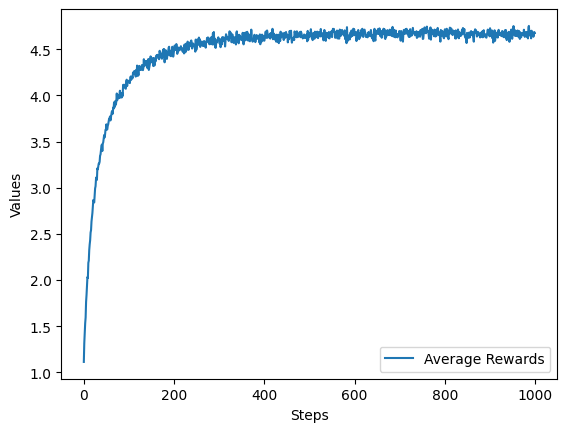

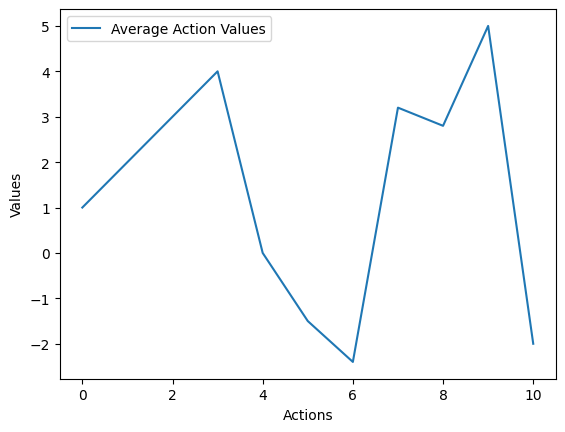

In [38]:
average_rewards, average_action_values = start_iterations([1, 2, 3, 4, 0, -1.5, -2.4, 3.2, 2.8, 5, -2], "stationary", iterations=2000, epsilon=0.1, alpha=None, steps=1000)
#plot the average rewards vs steps
import matplotlib.pyplot as plt

plt.plot(average_rewards, label='Average Rewards')
plt.xlabel('Steps')
plt.ylabel('Values')
plt.legend()
plt.show()

#Plot Average Action Values
plt.plot(average_action_values, label='Average Action Values')
plt.xlabel('Actions')
plt.ylabel('Values')
plt.legend()
plt.show()

## From the graph, we can observe that the ε-greedy approach estimated the action values effectively and achieved higher rewards as the steps progressed. This indicates that the ε-greedy method performs well in environments with a stationary reward distribution.

----------Iteration: 1----------
Step: 1000, Action: 9, Reward: 3.01
Step: 2000, Action: 0, Reward: 5.39
Step: 3000, Action: 0, Reward: 3.76
Step: 4000, Action: 0, Reward: 2.90
Step: 5000, Action: 5, Reward: 10.19
Step: 6000, Action: 5, Reward: 11.97
Step: 7000, Action: 5, Reward: 5.03
Step: 8000, Action: 6, Reward: 3.30
Step: 9000, Action: 7, Reward: 9.25
Step: 10000, Action: 7, Reward: 11.15
Action Values Mean: [4.4046158440278695, -6.215079620176615, -10.866542217632158, -0.9119549563539364, 3.611989602348274, 7.116328119486389, 9.396278980002334, 9.308974035388477, -9.899787837598163, 6.4427550831144, 6.912260627799425]
----------Iteration: 2----------
Step: 1000, Action: 1, Reward: 2.75
Step: 2000, Action: 4, Reward: 8.04
Step: 3000, Action: 4, Reward: 10.27
Step: 4000, Action: 4, Reward: 3.87
Step: 5000, Action: 4, Reward: -0.44
Step: 6000, Action: 5, Reward: 10.45
Step: 7000, Action: 5, Reward: 8.10
Step: 8000, Action: 5, Reward: 4.95
Step: 9000, Action: 4, Reward: 5.70
Step: 10

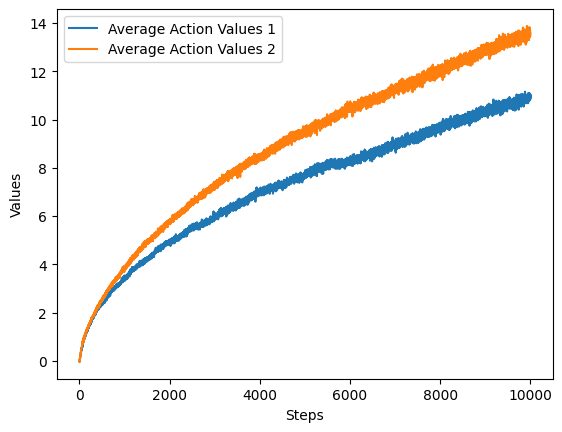

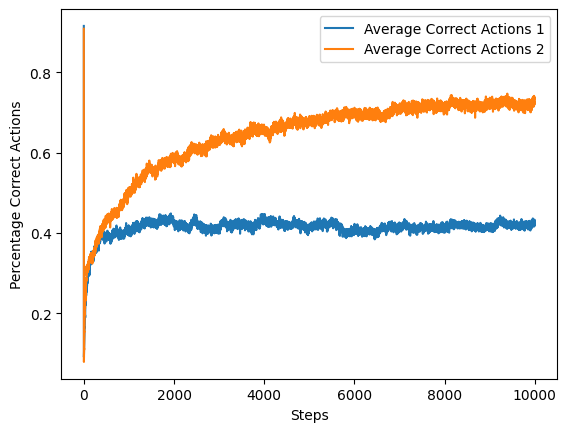

In [43]:
average_action_values1, average_action_values2, average_is_correct_action1, average_is_correct_action2, average_action_values = start_iterations_new([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], "non-stationary", iterations=2000, epsilon=0.1, alpha=0.1, steps=10000)

#plot the average rewards vs steps both in single plot
import matplotlib.pyplot as plt

plt.plot(average_action_values1, label='Average Action Values 1')
plt.plot(average_action_values2, label='Average Action Values 2')
plt.xlabel('Steps')
plt.ylabel('Values')
plt.legend()
plt.show()

#Plot Percentage correct actions at each step
plt.figure()
plt.plot(average_is_correct_action1, label='Average Correct Actions 1')
plt.plot(average_is_correct_action2, label='Average Correct Actions 2')
plt.xlabel('Steps')
plt.ylabel('Percentage Correct Actions')
plt.legend()
plt.show()


## From the above graphs we observer that Sampling Average method of estimating the action values is not effective to pick the optimal actions as compared to the Constant Alpha Method which assigns more weightage to the recent rewards to adapt the action values to the non stationary reward distribution.